In [523]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter, Gate
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import UnitaryGate

import numpy as np

# Mini Project #1
## Noah Lanier - Multi-controlled $U$-gate
---
Task: Write a Qiskit function that takes two inputs: a positive integer $n$ and a matrix $U\in U(2)$ and outputs a quantum circuit on $n+1$ qubits, possibly with further ancilla, that implements a multi-controlled $U$-gate, $C^n U$, that is
$$C^n U |x\rangle_n |y\rangle_1=
\begin{cases}
|x\rangle_n U |y\rangle_1, & \text{if } x=(1,1,\dots,1),\\
|x\rangle_n |y\rangle_1, & \text{otherwise.}
\end{cases}$$
The construction may only use arbitrary 1-qubit gates ($U$ gates) and $CX$ gates. No classical bit and measurements allowed.
***

---
This mini project will be based on the ideas of Figure 4.10 from [Nielsen and Chuang](https://archive.org/details/QuantumComputationAndQuantumInformation10thAnniversaryEdition). First we will define a Toffoli gate out of arbitrary 1-qubit gates and CNOT gates.


The matrix representation of this circuit is:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


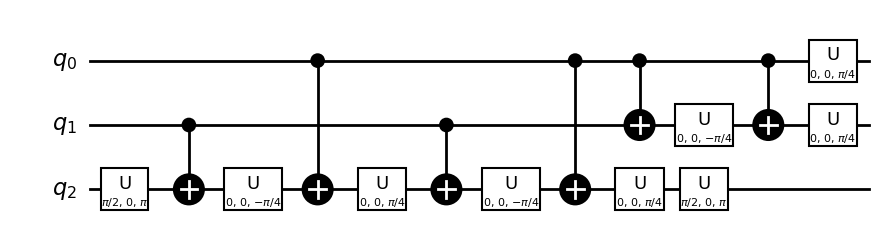

In [592]:
qr = QuantumRegister(3, "q")
qc = QuantumCircuit(qr,name = " CCX ")

qc.u(np.pi/2,0,np.pi,qr[2]) # Hadamard gate in terms of arbitrary U gate

qc.cx(qr[1],qr[2])

qc.u(0,0,-np.pi/4,qr[2]) # T^dagger gate in terms of arbitrary U gate

qc.cx(qr[0],qr[2])

qc.u(0,0,np.pi/4,qr[2]) # T gate in terms of arbitrary U gate

qc.cx(qr[1],qr[2])

qc.u(0,0,-np.pi/4,qr[2]) # T^dagger gate in terms of arbitrary U gate

qc.cx(qr[0],qr[2])

qc.u(0,0,np.pi/4,qr[2]) # T gate in terms of arbitrary U gate

qc.cx(qr[0],qr[1])

qc.u(np.pi/2,0,np.pi,qr[2]) # Hadamard gate in terms of arbitrary U gate

qc.u(0,0,-np.pi/4,qr[1]) # T^dagger gate in terms of arbitrary U gate

qc.cx(qr[0],qr[1])

qc.u(0,0,np.pi/4,qr[0]) # T gate in terms of arbitrary U gate

qc.u(0,0,np.pi/4,qr[1]) # T gate in terms of arbitrary U gate


print("The matrix representation of this circuit is:")
print(np.real(np.round(np.array(Operator(qc)), 3)).astype(int))

qc.draw(output="mpl", style="bw")


We can check that this circuit indeed is the same as a Toffoli gate by looking at the matrix of a Toffoli gate and comparing with above.


The matrix norm of the operator from the above circuit minus the Toffoli gate operator is  0.0
The matrix representation of the Toffoli gate is:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]]


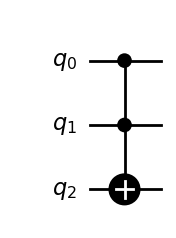

In [595]:
qr2 = QuantumRegister(3, "q")
qc2 = QuantumCircuit(qr2)

qc2.ccx(qr2[0],qr2[1],qr2[2])



print("The matrix norm of the operator from the above circuit minus the Toffoli gate operator is ",  np.linalg.norm(np.round(np.array(Operator(qc)) - Operator(qc2), 1)))
print("The matrix representation of the Toffoli gate is:")
print(np.real(np.round(np.array(Operator(qc2)), 3)).astype(int))

qc2.draw(output="mpl", style="bw")


We now define the decomposed Toffoli circuit above as a new gate:

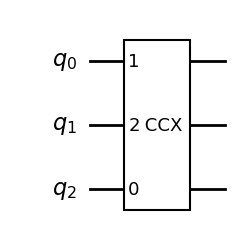

In [598]:
qr3 = QuantumRegister(3, "q")
qc3 = QuantumCircuit(qr3)


ccx = qc.to_instruction()

qc3.append(ccx,[qr3[2],qr3[0],qr3[1]])



qc3.draw(output="mpl", style="bw")


We can see that the bottom number in the new "CCX" gate is the target, for instance above, the $q_0$ qubit is the target with control qubits $q_1,q_2$. Now that we have constructed Toffoli gates out of arbitrary 1-qubit gates and CNOT gates, we must build a controlled $U$-gate.
***
Every 1-qubit gate is equivalent to one of the form:

$U(\theta, \varphi, \lambda) = \begin{bmatrix} \cos \left( \tfrac{\theta}{2} \right) & - e^{i \lambda} \sin \left( \tfrac{\theta}{2} \right) \\ e^{i \varphi} \sin \left( \tfrac{\theta}{2} \right) & e^{i (\varphi + \lambda)} \cos \left( \tfrac{\theta}{2} \right) \end{bmatrix}$,

for some $(\theta, \varphi, \lambda) \in \left[ 0, 2 \pi \right)^3$. We also have Theorem 4.1 from Nielsen and Chuang that says for any $U\in U(2)$ there exist real numbers $\alpha,\beta,\gamma,\delta$ such that
\\[U=e^{i\alpha} R_z(\beta) R_y(\gamma) R_z(\delta).\\]

A quick calculation will show \\[\begin{align*} \theta &= \gamma\\ \varphi &= \alpha - \frac{\beta}{2}-\frac{\delta}{2}\\ \lambda &=\alpha +\frac{\delta}{2}-\frac{\beta}{2}.\end{align*}\\]

The rotation gates $R_z$ and $R_y$ are given in terms of arbitrary $U3$ gates as such:

$R_Y (\theta) = \begin{bmatrix} \cos \left( \tfrac{\theta}{2} \right) & - \sin \left( \tfrac{\theta}{2} \right) \\ \sin \left( \tfrac{\theta}{2} \right) & \cos \left( \tfrac{\theta}{2} \right) \end{bmatrix} =  U \left( \theta, 0, 0 \right)$.

$R_Z (\theta) = \begin{bmatrix} e^{- i \frac{\theta}{2}} & 0 \\ 0 & e^{i \frac{\theta}{2}} \end{bmatrix} =  e^{- i \frac{\theta}{2}} U \left( 0, 0, \theta \right)$.

Corollary 4.2 tells us that for any $U\in U(2)$ there exists $A,B,C\in U(2)$ such that $ABC=I$ and $U=e^{i\alpha} AXBXC$. Using the notation of theorem 4.1, set $A \equiv e^{- i \frac{\beta}{2}} U \left( 0, 0, \beta \right) U \left( \gamma/2, 0, 0 \right)$, $B\equiv e^{ i \frac{(\delta+\beta)}{4}}U \left( \frac{-\gamma}{2}, 0, 0 \right)U \left( 0, 0, \frac{-(\delta+\beta)}{2} \right)$ and $C\equiv e^{ -i \frac{(\delta-\beta)}{4}}U \left( 0, 0, \frac{(\delta-\beta)}{2} \right)$ and $A,B,C$ will satisfy the properties of $A,B,C$ in the corollary. Let's define the operators $A,B,C$ below.
***

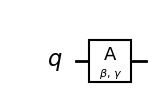

In [741]:
Theta, Phi, Lambda, Alpha, Beta, Gamma, Delta = Parameter(r"$\theta$"), Parameter(r"$\varphi$"), Parameter(r"$\lambda$"), Parameter(r"$\alpha$"), Parameter(r"$\beta$"), Parameter(r"$\gamma$"), Parameter(r"$\delta$")


quantum_register = QuantumRegister(1, "x")
quantum_circuit = QuantumCircuit(quantum_register, name = "A")

Theta = Gamma
Phi = Alpha - Beta/2 - Delta/2
Lambda = Alpha + Delta/2 - Beta/2



quantum_circuit.u(0, 0, Beta, quantum_register[0])

quantum_circuit.u(Gamma/2,0,0,quantum_register[0])

A = quantum_circuit.to_instruction()

quantum_register1 = QuantumRegister(1, "q")

quantum_circuit1 = QuantumCircuit(quantum_register1)

quantum_circuit1.append(A,[quantum_register1[0]])




quantum_circuit1.draw(output="mpl", style="bw")

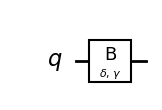

In [743]:
quantum_register = QuantumRegister(1, "x")
quantum_circuit = QuantumCircuit(quantum_register, name = "B")




quantum_circuit.u(-Gamma/2, 0, 0, quantum_register[0])

quantum_circuit.u(0,0,-(Delta+Gamma)/2,quantum_register[0])

B = quantum_circuit.to_instruction()

quantum_register1 = QuantumRegister(1, "q")

quantum_circuit1 = QuantumCircuit(quantum_register1)

quantum_circuit1.append(B,[quantum_register1[0]])




quantum_circuit1.draw(output="mpl", style="bw")

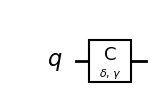

In [745]:
quantum_register = QuantumRegister(1, "x")
quantum_circuit = QuantumCircuit(quantum_register, name = "C")




quantum_circuit.u(0,0,(Delta-Gamma)/2,quantum_register[0])

C = quantum_circuit.to_instruction()

quantum_register1 = QuantumRegister(1, "q")

quantum_circuit1 = QuantumCircuit(quantum_register1)

quantum_circuit1.append(C,[quantum_register1[0]])




quantum_circuit1.draw(output="mpl", style="bw")

Now a controlled-$U$ gate is given by the circuit:

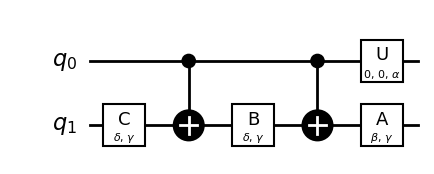

In [748]:
qr=QuantumRegister(2,"q")
qc=QuantumCircuit(qr,name = "   CU   ")




qc.append(C,[qr[1]])

qc.cx(qr[0],qr[1])

qc.append(B,[qr[1]])

qc.cx(qr[0],qr[1])

qc.u(0,0,Alpha,qr[0])

qc.append(A,[qr[1]])




CU = qc.to_instruction()

qc.draw(output="mpl", style="bw")


It is easy to see that if $q_0=0$ then $ABC=I$ is applied to $q_1$ and if $q_0=1$ then $AXBXC=U$ is applied to $q_1$. Let's define this circuit as its own gate now as well.

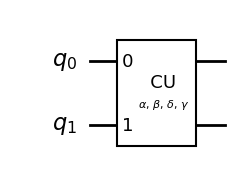

In [751]:
qr=QuantumRegister(2,"q")
qc=QuantumCircuit(qr)




qc.append(CU,[qr[0],qr[1]])




qc.draw("mpl",style="bw")

---
Finally, using the construction from Nielsen and Chuang Figure 4.10, we can create a circuit with $(n-1)$ ancillary qubits, $2(n-1)$ Toffoli gates and $1$ controlled-$U$ gate to create a $C^n U$ gate. The ancillary qubits should all start and end in $|0\rangle$. Let's look at a construction for $n=3$:

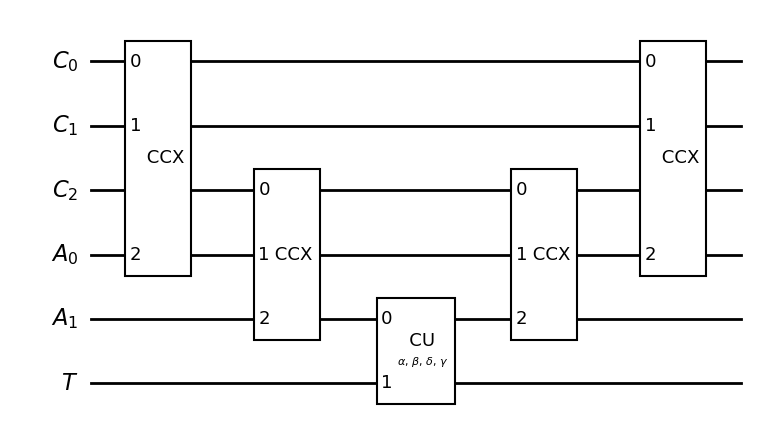

In [754]:
qr=QuantumRegister(3,"C")
ar=AncillaRegister(2,"A")
tr=QuantumRegister(1,"T")

qc=QuantumCircuit(qr,ar,tr,name= "C^3 U")




qc.append(ccx,[qr[0],qr[1],ar[0]])

qc.append(ccx,[qr[2],ar[0],ar[1]])

qc.append(CU, [ar[1],tr[0]])

qc.append(ccx,[qr[2],ar[0],ar[1]])

qc.append(ccx,[qr[0],qr[1],ar[0]])




qc.draw("mpl",style="bw")

And $n=4$:

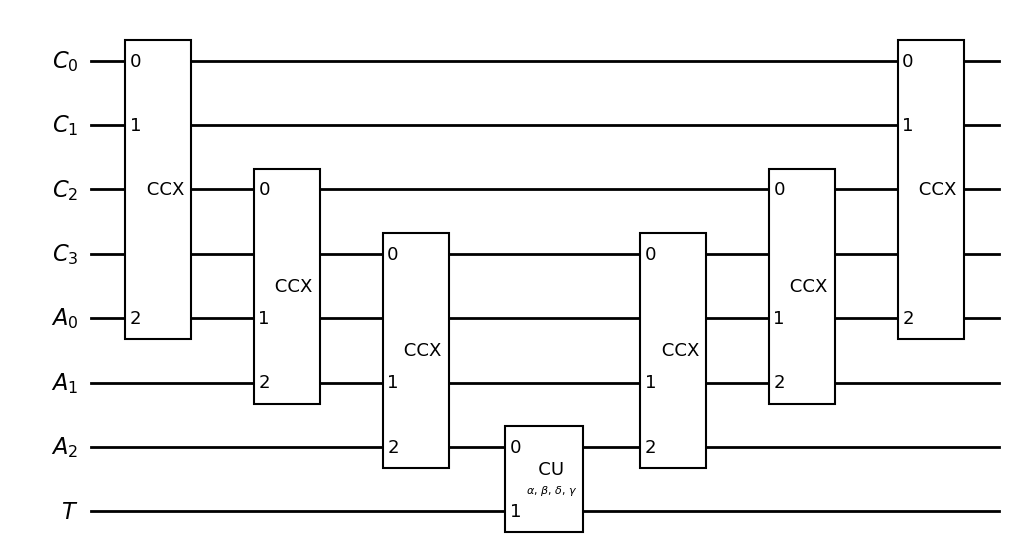

In [757]:
qr=QuantumRegister(4,"C")
ar=AncillaRegister(3,"A")
tr=QuantumRegister(1,"T")

qc=QuantumCircuit(qr,ar,tr,name= "C^3 U")




qc.append(ccx,[qr[0],qr[1],ar[0]])

qc.append(ccx,[qr[2],ar[0],ar[1]])

qc.append(ccx,[qr[3],ar[1],ar[2]])

qc.append(CU, [ar[2],tr[0]])

qc.append(ccx,[qr[3],ar[1],ar[2]])

qc.append(ccx,[qr[2],ar[0],ar[1]])

qc.append(ccx,[qr[0],qr[1],ar[0]])




qc.draw("mpl",style="bw")

---
This algorithm is using Toffoli gates to 'AND' all $C_n$ qubits together. The first Toffoli multiplies $C_0$ and $C_1$ and stores the result in the first ancillary qubit. The next Toffoli gate multiplies the previous ancillary qubit with $C_2$ and the process continues until the last control qubit. The final ancillary qubit, $A_{n-1}$, equals $C_1\cdot C_2\cdots C_n$ and therefore only applies the $U$ gate to the target qubit, $T$, if $C_1\cdot C_2\cdots C_n=1$. Now that $U$ is applied to the target, all there is left to do is set all the (potentially) flipped qubits back.
 
We know that our Toffoli gates decompose into nine 1-qubit $U3$ gates and six CNOT gates. Therefore $18(n-1)$ 1-qubit gates are coming from use of Toffoli gates in the construction. The controlled-$U$ gate also costs six single qubit gates and two CNOTs. Thus, altogether, it costs $18n-12$ 1-qubit gates and $12n-10$ CNOT gates for this construction of $C^n U$.

The contrustion of our Toffoli gates had a circuit depth of $12$ and our $CU$ gate had a circuit depth of $7$. Therefore our construction of $C^n U$ has circuit depth of $24n-17.$
***
Finally, let's define an ```MCU``` function that takes in an integer $n\geq 2$ and returns a circuit of our algorithm above.

In [760]:
def MCU(n: int, Theta, Phi, Lambda):

    qr = QuantumRegister(n, "C")
    ar = AncillaRegister(n - 1, "A")
    tr = QuantumRegister(1, "T")
    qc = QuantumCircuit(qr, ar, tr, name = "MCU")


    
    # Step 1.
    qc.append(ccx,[qr[0],qr[1],ar[0]])

    # Step 2.
    for i in range(n-2):
        qc.append(ccx,[qr[i+2],ar[i],ar[i+1]])
    
    # Step 3.
    qc.append(CU, [ar[n-2],tr[0]])

    # Step 4.
    for i in reversed(range(n-2)):
        qc.append(ccx,[qr[i+2],ar[i],ar[i+1]])

    # Step 5.
    qc.append(ccx,[qr[0],qr[1],ar[0]])
        

    return qc

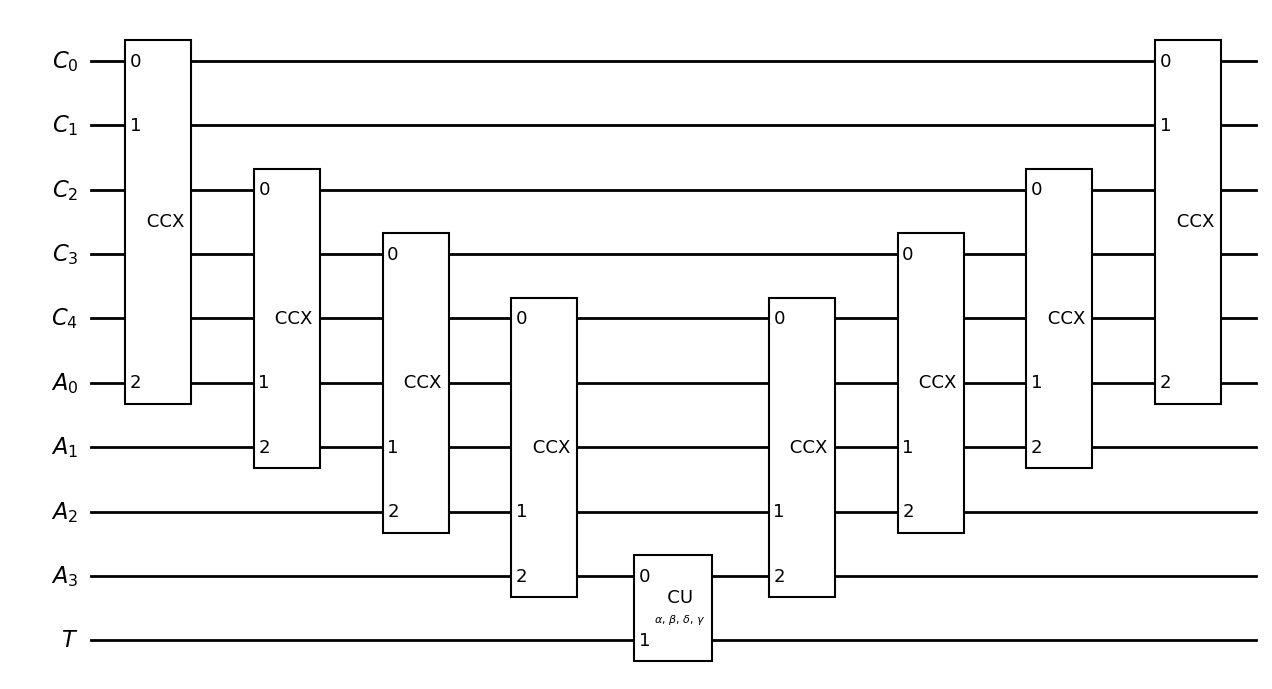

In [762]:
n=5
MCU(n,np.pi/2,0,np.pi).draw("mpl",style="bw")